Text(0,0.5,'Energy_L')

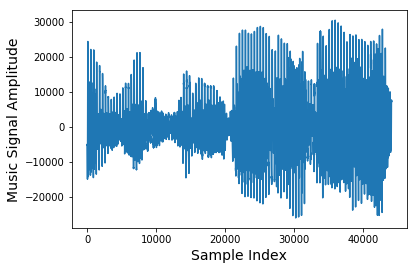

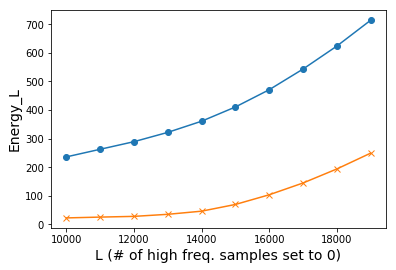

In [12]:
# Without Haar - Only DFT and DCT - For 1 sec of data
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.io.wavfile import read
from scipy.fftpack import fft,dct,idct,ifft

data = read("Test1.wav")
x_temp = np.array(data[1],dtype = float)

N = 44100
x = x_temp[40000:40000+N,0]
fig,ax = plt.subplots()
ax.plot(x)
ax.set_xlabel('Sample Index',fontsize=14)
ax.set_ylabel('Music Signal Amplitude',fontsize=14)

X_dft = fft(x)
X_dct = dct(x,norm='ortho',type=2)

energy_dft = []
energy_dct = []
X_dft_m = np.ones((N),dtype = complex)
X_dct_m = np.ones((N))

def energy_calc(x,y,N): 
    energy_l = 0
    x_sum = 0
    for n in range (0,N):
        energy_l = energy_l + (abs(x[n]-y[n])**2)
        x_sum = x_sum + abs(x[n])**2
    
    energy_l = (1/N)*energy_l
    #energy_l = energy_l/x_sum
   
    return energy_l

Larray = []
for L in range(10000,20000,1000):
    Larray.append(L)
    
    for k in range (0,int((N-L)/2)):
        X_dft_m[k] = X_dft[k]
    for k in range (int((N-L)/2), int((N+L)/2)):
        X_dft_m[k] = 0
    for k in range (int((N+L)/2), N):
        X_dft_m[k] = X_dft[k]

    for k in range (0, N-L):
        X_dct_m[k] = X_dct[k]
        #X_haar_m[k] = X_haar[k]
        
    for k in range (N-L, N):
        X_dct_m[k] = 0
        #X_haar_m[k] = 0
    
    x_dft_m = ifft(X_dft_m)
    x_dct_m = idct(X_dct_m,norm='ortho',type=2)
    #x_haar_m = np.dot(inv_h,X_haar_m)

    energy_dft.append(energy_calc(x,x_dft_m,N))
    energy_dct.append(energy_calc(x,x_dct_m,N))
    #energy_haar.append(energy_calc(x,x_haar_m,N))

fig,ax = plt.subplots()
ax.plot(Larray,energy_dft, 'o-')
ax.plot(Larray,energy_dct, 'x-')
#ax.plot(Larray,energy_haar, '+-')
ax.set_xlabel('L (# of high freq. samples set to 0)',fontsize=14)
ax.set_ylabel('Energy_L',fontsize=14)

Text(0,0.5,'Energy_L')

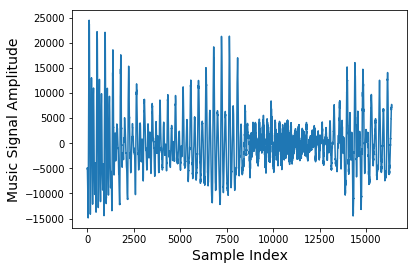

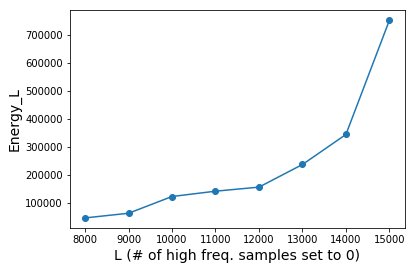

In [13]:
# Only Haar - My Own Function - For less number of samples
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.io.wavfile import read
from scipy.fftpack import fft,dct,idct,ifft

data = read("Test1.wav")
x_temp = np.array(data[1],dtype = float)

N = 16384
x = x_temp[40000:40000+N,0]
fig,ax = plt.subplots()
ax.plot(x)
ax.set_xlabel('Sample Index',fontsize=14)
ax.set_ylabel('Music Signal Amplitude',fontsize=14)

def haar_matrix(N):
    if N > 2:
        D_haar = haar_matrix(N/2)       
    else:
        D_haar = (1/np.sqrt(2))*np.array([[1, 1], [1, -1]])
        return D_haar
        
    # calculate upper part
    D_haar_u = np.kron(D_haar,[(1/np.sqrt(2)),(1/np.sqrt(2))]) 

    # calculate lower part 
    D_haar_l = np.kron(np.eye(len(D_haar)),[(1/np.sqrt(2)),-(1/np.sqrt(2))])

    # Combine 
    D_haar = np.vstack((D_haar_u, D_haar_l))

    return D_haar

def inv_haar_matrix(D_haar,N):
    
    inv_D_haar = D_haar.T 
    return inv_D_haar

h = haar_matrix(N)
inv_h = inv_haar_matrix(h,N)
X_haar = np.dot(h,x)

energy_haar = []
X_haar_m = np.ones((N))

def energy_calc(x,y,N): 
    energy_l = 0
    x_sum = 0
    for n in range (0,N):
        energy_l = energy_l + (abs(x[n]-y[n])**2)
        x_sum = x_sum + abs(x[n])**2
    
    energy_l = (1/N)*energy_l
    #energy_l = energy_l/x_sum
   
    return energy_l

Larray = []
for L in range(8000,16000,1000):
    Larray.append(L)
    
    for k in range (0, N-L):
        X_haar_m[k] = X_haar[k]
        
    for k in range (N-L, N):
        X_haar_m[k] = 0
    
    x_haar_m = np.dot(inv_h,X_haar_m)
    energy_haar.append(energy_calc(x,x_haar_m,N))

fig,ax = plt.subplots()
ax.plot(Larray,energy_haar, 'o-')
ax.set_xlabel('L (# of high freq. samples set to 0)',fontsize=14)
ax.set_ylabel('Energy_L',fontsize=14)

In [10]:
# Testing Python Inbuilt Functions 
import pywt

a = [1, 2, 3, 4]
(Xa,Xd) = pywt.dwt(a,'haar')
b = pywt.idwt(Xa,Xd,'haar') 
print (Xa,Xd,b)

[2.12132034 4.94974747] [-0.70710678 -0.70710678] [1. 2. 3. 4.]


Text(0,0.5,'Energy_L')

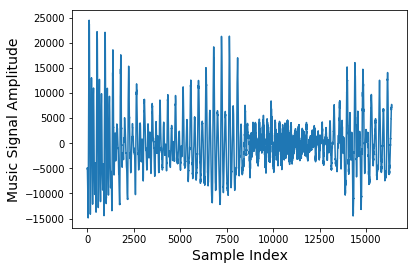

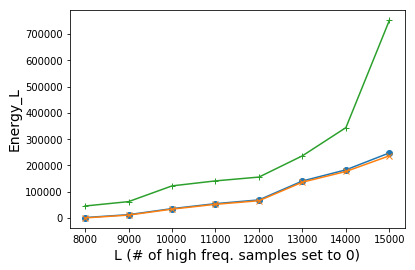

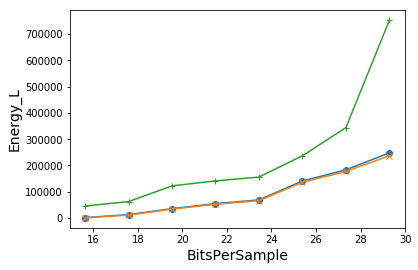

In [5]:
# DFT,DCT,Haar - Using My Own Haar Function - For less number of samples
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.io.wavfile import read
from scipy.fftpack import fft,dct,idct,ifft

data = read("Test1.wav")
x_temp = np.array(data[1],dtype = 'float32')

N = 16384
x = x_temp[40000:40000+N,0]
fig,ax = plt.subplots()
ax.plot(x)
ax.set_xlabel('Sample Index',fontsize=14)
ax.set_ylabel('Music Signal Amplitude',fontsize=14)

def haar_matrix(N):
    if N > 2:
        D_haar = haar_matrix(N/2)       
    else:
        D_haar = (1/np.sqrt(2))*np.array([[1, 1], [1, -1]])
        return D_haar
        
    # calculate upper part
    D_haar_u = np.kron(D_haar,[(1/np.sqrt(2)),(1/np.sqrt(2))]) 

    # calculate lower part 
    D_haar_l = np.kron(np.eye(len(D_haar)),[(1/np.sqrt(2)),-(1/np.sqrt(2))])

    # Combine 
    D_haar = np.vstack((D_haar_u, D_haar_l))

    return D_haar

def inv_haar_matrix(D_haar,N):
    
    inv_D_haar = D_haar.T 
    return inv_D_haar

h = haar_matrix(N)
inv_h = inv_haar_matrix(h,N)
X_haar = np.dot(h,x)

X_dft = fft(x)
X_dct = dct(x,norm='ortho',type=2)

energy_dft = []
energy_dct = []
energy_haar = []
X_dft_m = np.ones((N),dtype = 'complex64')
X_dct_m = np.ones((N))
X_haar_m = np.ones((N))

def energy_calc(x,y,N): 
    energy_l = 0
    x_sum = 0
    for n in range (0,N):
        energy_l = energy_l + (abs(x[n]-y[n])**2)
        x_sum = x_sum + abs(x[n])**2
    
    energy_l = (1/N)*energy_l
    #energy_l = energy_l/x_sum
   
    return energy_l

Larray = []
b=32
BitsPerSampleArray = []
for L in range(8000,16000,1000):
    Larray.append(L)
    BitsPerSample = b*L/N
    BitsPerSampleArray.append(BitsPerSample)
    
    for k in range (0,int((N-L)/2)):
        X_dft_m[k] = X_dft[k]
    for k in range (int((N-L)/2), int((N+L)/2)):
        X_dft_m[k] = 0
    for k in range (int((N+L)/2), N):
        X_dft_m[k] = X_dft[k]

    for k in range (0, N-L):
        X_dct_m[k] = X_dct[k]
        X_haar_m[k] = X_haar[k]
        
    for k in range (N-L, N):
        X_dct_m[k] = 0
        X_haar_m[k] = 0
    
    x_dft_m = ifft(X_dft_m)
    x_dct_m = idct(X_dct_m,norm='ortho',type=2)
    x_haar_m = np.dot(inv_h,X_haar_m)

    energy_dft.append(energy_calc(x,x_dft_m,N))
    energy_dct.append(energy_calc(x,x_dct_m,N))
    energy_haar.append(energy_calc(x,x_haar_m,N))

fig,ax = plt.subplots()
ax.plot(Larray,energy_dft, 'o-')
ax.plot(Larray,energy_dct, 'x-')
ax.plot(Larray,energy_haar, '+-')
ax.set_xlabel('L (# of high freq. samples set to 0)',fontsize=14)
ax.set_ylabel('Energy_L',fontsize=14)

fig,ax = plt.subplots()
ax.plot(BitsPerSampleArray,energy_dft, 'o-')
ax.plot(BitsPerSampleArray,energy_dct, 'x-')
ax.plot(BitsPerSampleArray,energy_haar, '+-')
ax.set_xlabel('BitsPerSample',fontsize=14)
ax.set_ylabel('Energy_L',fontsize=14)